In [1]:
# ML_in_Finance-PCA-SP500
# Author: Matthew Dixon
# Version: 1.0 (24.7.2019)
# License: MIT
# Email: matthew.dixon@iit.edu
# Notes: tested on Mac OS X with Python 3.6 and Tensorflow 1.3.0
# Citation: Please cite the following reference if this notebook is used for research purposes:
# Dixon M.F., I. Halperin and P. Bilokon, Machine Learning in Finance: From Theory to Practice, Springer Graduate textbook Series, 2020.

# Overview

The purpose of this notebook is to demonstrate the application of PCA, as a method of dimensionality reduction, to time series of adjusted close prices of SP500 listed assets. The analysis assumes that the prices are weakly covariance stationarity and uses the principal components to explain price variance. The components are also compared with the SP500 index price and index prices are regressed on the components to observe their importance.

In [2]:
from plotly.graph_objs import Bar, Scatter, Layout, Figure
from plotly.graph_objs.layout import YAxis
from plotly.offline import iplot
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
%matplotlib inline

ModuleNotFoundError: No module named 'plotly'

In [14]:
conda install -c plotly plotly=4.14.3

Solving environment: ...working... done

# All requested packages already installed.

Note: you may need to restart the kernel to use updated packages.



In [2]:
from plotly.graph_objs import Bar, Scatter, Layout, Figure
from plotly.graph_objs.layout import YAxis
from plotly.offline import iplot
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [39]:
SP500 = pd.read_csv('/Users/josep/Downloads/Books/Stock Analysis/VOO.csv', index_col='Date').dropna(axis = 1)

RUSSELL2000Index = pd.read_csv('/Users/josep/Downloads/Books/Stock Analysis/UWM.csv', index_col='Date')['Close'][:len(SP500)]


In [40]:
print(RUSSELL2000Index)

Date
2020-04-17     36.450001
2020-04-20     35.580002
2020-04-21     33.830002
2020-04-22     34.730000
2020-04-23     35.450001
                 ...    
2021-04-12    112.550003
2021-04-13    111.970001
2021-04-14    114.160004
2021-04-15    115.080002
2021-04-16    115.570000
Name: Close, Length: 252, dtype: float64


 Standardize the adjusted close prices of assets in the SP500

In [42]:
RUSSELL2000Indexmoves = RUSSELL2000Index.pct_change().dropna()


AttributeError: 'Series' object has no attribute 'columns'

 Estimate the variance of the standardized asset prices and compute the eigenvalues and eigenvectors

In [44]:
RUSSELL2000Indexmovesnorm = (RUSSELL2000Indexmoves - RUSSELL2000Indexmoves.mean()) / RUSSELL2000Indexmoves.std()

 Plot the cumulative explain variance against increasing PCs

In [45]:
tot = sum(eig_vals)
var_exp = [(i / tot) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

trace1 = Bar(
        x=['PC %s' %i for i in range(1, 100)],
        y=var_exp,
        showlegend=False)

trace2 = Scatter(
        x=['PC %s' %i for i in range(1, 100)], 
        y=cum_var_exp,
        name='Cumulative explained variance')

data = (trace1, trace2)

layout = Layout(
        yaxis=YAxis(title='Explained variance in percent'),
        title='Explained variance per principal component')

fig = Figure(data=data, layout=layout)

iplot(fig)

 Visualize the first ten principle components (PCs) over time and compare with the standardized SP500 index price series

In [46]:
PCs = np.matmul(RUSSELL2000INDEXnorm.values, eig_vecs)
PCs = pd.DataFrame(PCs, index=RUSSELL2000INDEXnorm.index)
PCs['RUSSELL2000INDEX'] = (RUSSELL2000Index - RUSSELL2000Index.mean())/RUSSELL2000Index.std()

NameError: name 'RUSSELL2000INDEXnorm' is not defined

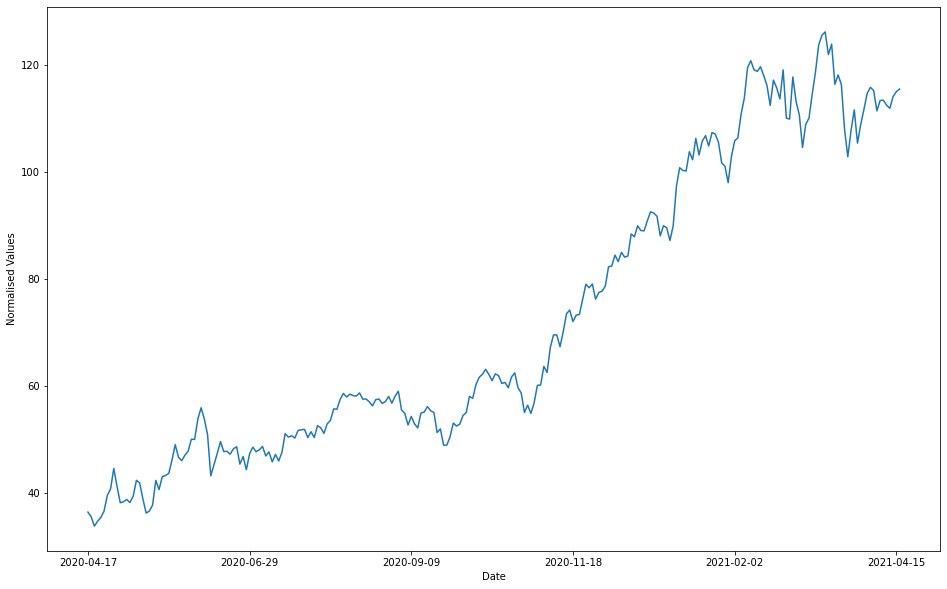

In [48]:

colnames = ['PC'+str(i) for i in np.arange(len(PCs.columns.values) - 1)] + ['RUSSELL2000INDEX']
PCs.columns = colnames

RUSSELL2000Index.plot(figsize=(16, 10))
plt.ylabel('Normalised Values');

In [50]:
Y = PCs['RUSSELL2000Index']



KeyError: 'RUSSELL2000Index'